In [1]:
#打开数据集
import numpy as np
import scipy.io as scio
import matplotlib as mpl
import matplotlib.pyplot as plt

file_path ="C:/Users/70951/Desktop/mnist-original.mat"
mnist = scio.loadmat(file_path)
mnist.keys()

#数据整理
X, y = mnist["data"], mnist["label"]
X = X.transpose()
X.shape
y = y.transpose()
y.shape
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train=y_train.ravel()
y_test=y_test.ravel()

Text(0.5, 1.0, 'GaussianNB:Confusion_matrix')

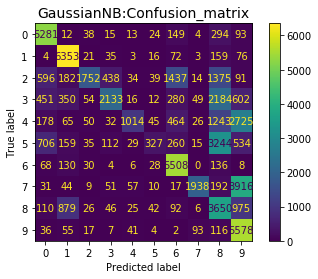

In [3]:
# Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
cross_val_score(gnb_clf, X_train, y_train, cv=3, scoring="accuracy")# 每一次验证的正确概率输出
#结果： array([0.5592 , 0.56035, 0.55715])
y_gnb_pred = cross_val_predict(gnb_clf, X_train, y_train.ravel(), cv=3)
conf_mx = confusion_matrix(y_train, y_gnb_pred)
conf_mx_display = ConfusionMatrixDisplay(conf_mx, display_labels='0123456789')
conf_mx_display.plot(values_format='.4g')
plt.title("GaussianNB:Confusion_matrix", fontsize=14)

Text(0.5, 1.0, 'BernoulliNB:Confusion_matrix')

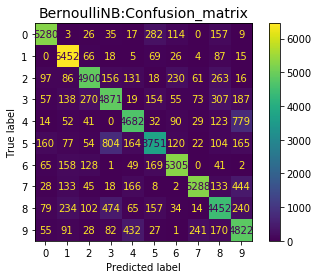

In [4]:
#  Bernoulli Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
bnb_clf = BernoulliNB(alpha=1)   #alpha平滑参数,0表示不平滑
bnb_clf.fit(X_train, y_train)
cross_val_score(bnb_clf, X_train, y_train, cv=3, scoring="accuracy")# 每一次验证的正确概率输出
#Out[34]: array([0.8252 , 0.82605, 0.8389 ])

y_bnb_pred = cross_val_predict(bnb_clf, X_train, y_train.ravel(), cv=3)
conf_mx = confusion_matrix(y_train, y_bnb_pred)
conf_mx_display = ConfusionMatrixDisplay(conf_mx, display_labels='0123456789')
conf_mx_display.plot(values_format='.4g')
plt.title("BernoulliNB:Confusion_matrix", fontsize=14)